# Analyzing the probability distribution of the square-lattice Ising model

Using the prototype `ising2d.py` code to measure probability distribution after the steady state situation has been reached ($\approx$ 200000 MCC), by measuring frequency of energies. 

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from prototype.ising2d import temp_loop
from matplotlib import pyplot as plt
import numpy as np

In [14]:
L = 20
trials = 1000000
temp_init = 1.0
temp_end = 2.4
temp_step = 0.7

temps = np.arange(temp_init, temp_end + temp_step/2, temp_step, float)
(energy, E_variance, Energies, temperature, _,) = temp_loop(temps, L, trials)
Energies = Energies[:, 200000:] # Discarding before steady state

Variance for temperature = 1.0[kT/J] is 0.02339166300371289
Variance for temperature = 2.4[kT/J] is 1.408404977024159


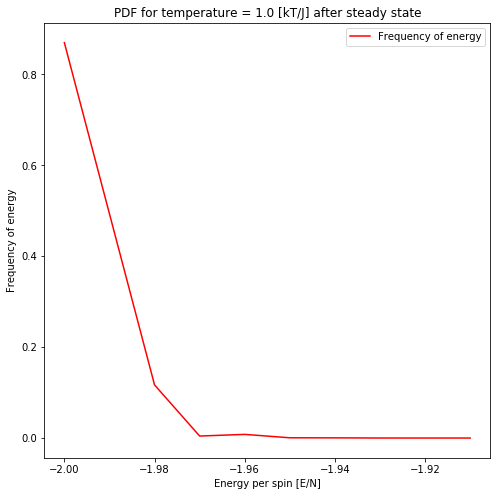

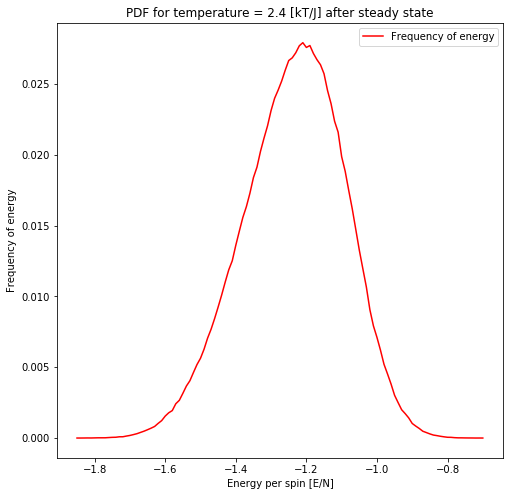

In [25]:
ks = [0, 2]

for k in ks:
    plt.figure(figsize=(8,8))
    uniqueE, countsE = np.unique(Energies[k, :], return_counts=True)

    np.c_[uniqueE, countsE]
    etmp = np.sort(np.c_[uniqueE, countsE], axis=1)

    #edict = dict(zip(uniqueE, countsE))
    #etmp = np.asarray(sorted(edict.items()))

    stddev = np.sqrt(E_variance)
    avg = energy[k]
    print("Variance for temperature = {}[kT/J] is {}".format(temperature[k], E_variance[k]))

    #plt.axvline(avg - stddev[k], linestyle='--')
    #plt.axvline(avg + stddev[k], linestyle='--')

    plt.title("PDF for temperature = {} [kT/J] after steady state".format(temperature[k]))
    plt.plot(etmp[:, 0], etmp[:, 1]/np.sum(etmp[:, 1]), 'r-', label="Frequency of energy")
    plt.legend()
    plt.xlabel("Energy per spin [E/N]")
    plt.ylabel("Frequency of energy")

The computed variance $\sigma_E^2$ fits well with the measured PDF, small variance for when $T = 1$ and and bigger one when $T = 2.4$.